# Домашнее задание "Теория вероятности. Дискретные Случайные Величины".

### Уровень 0:

    Задание 1:

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов.

In [13]:
# Получается орел теоритически может выпасть от 0 до 15 раз. В этом диапазоне выбрать простые числа.
# Посчитать с какой вероятностью орлы выпадут такое количество раз - что это число должно быть простым

import math

def simpleNunmber(number): # Функция для получения списка простых чисел
    simple_num_list = []
    for num in range(2, number+1):
        step = 2
        while num % step != 0:
            step += 1
        if num == step:
            simple_num_list.append(num)
    
    return simple_num_list

total = 15 # количество подкидываний
p = 0.5 # вероятность выпадения орла при каждом подкидывании
total_p = 0 # вероятность выпадения простого числа орлов

# В цикле перебираем простые числа и считаем вероятность (по формуле из лекции) что орлы выпадут такое количество раз 
for success in simpleNunmber(total):
    c = (math.factorial(total))/(math.factorial(success)*(math.factorial(total - success)))
    item_p = c*p**success*(1-p)**(total-success)
    total_p += item_p

print("Вероятность выпадения простого числа орлов ->", total_p)


Вероятность выпадения простого числа орлов -> 0.3499755859375



    Задание 2:

Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.


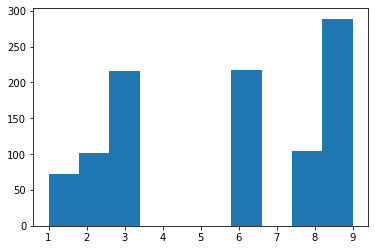

Среднее значение выборки -> 5.659
Дисперсия выборки 8.276719000000002
Медиана выборки 6.0


In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randint(1, 10, 10) # случайная величина
sempl_list = []

# Делаем 1000 случайных выборок из этой случаной величины
for item in range(0, 1000):
    sempl_list.append(np.random.choice(x))  
    
plt.figure()
plt.hist(sempl_list, bins=10)
plt.show()

print("Среднее значение выборки ->", np.mean(sempl_list))
print("Дисперсия выборки", np.var(sempl_list))
print("Медиана выборки", np.median(sempl_list))


### Уровень 1:

    Задание 3:

Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.


In [45]:
pA1 = 0.5 # Вероятность наступления события А1
pA2 = 0.5 # Вероятность наступления события А2
pA3 = 0.5 # Вероятность наступления события А2

pA1A2 = 0.25 # Вероятность наступления события А1 и А2 одновременно 
pA1A3 = 0.25 # Вероятность наступления события А1 и А3 одновременно
pA2A3 = 0.25 # Вероятность наступления события А2 и А3 одновременно
# В обратные стороны будет тоже самое - поэтому не стал отдельно считать

# Дальне считал условные вероятности

pA1_A2 = pA1A2/pA2 # Вероятность А1 при наступлении А2
pA1_A3 = pA1A3/pA3 # Вероятность А1 при наступлении А3

pA2_A1 = pA1A2/pA1 # Вероятность А2 при наступлении А1
pA2_A3 = pA2A3/pA3 # Вероятность А2 при наступлении А3

pA3_A1 = pA1A3/pA1 # Вероятность А3 при наступлении А1
pA3_A2 = pA2A3/pA2 # Вероятность А3 при наступлении А2

# Проверяем: если вероятность наступления события равно вероятности наступления этого события при условии наступления другого
# То события независимые
# Проверяем все пары
if pA1 == pA1_A2 and pA1 == pA1_A3 and pA2 == pA2_A1 and pA2 == pA2_A3 and pA3 == pA3_A1 and pA3 == pA3_A2:
    print("События попарно независимы")

pA1A2A3 = 0.25 # Вероятность наступления всех трех событий сразу

# нашел определение, что если вероятность наступления всех трех событий равно произвдению вероятностей каждого события
# то события являются независимыми в совокупности - так и проверял
if pA1A2A3 != pA1*pA2*pA3:
    print("События не являются независимыми в совокупности")
    

События попарно независимы
События не являются независимыми в совокупности



    Задание 4 (формула полной вероятности):

В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.


In [46]:
pA1 = 0.2 # Вероятность купить продукцию 1 преприятия
pB1_A1 = 0.1 # Вероятность купить продукцию высшего сорта при условии что купили продукцию 1 предприятия

pA2 = 0.3 # Вероятность купить продукцию 2 преприятия
pB2_A2 = 0.05 # Вероятность купить продукцию высшего сорта при условии что купили продукцию 2 предприятия

pA3 = 0.5 # Вероятность купить продукцию 3 преприятия
pB3_A3 = 0.2 # Вероятность купить продукцию высшего сорта при условии что купили продукцию 3 предприятия

# формула полной вероятности
P = pB1_A1*pA1+pB2_A2*pA2+pB3_A3*pA3
print("Вероятность купить продукцию высшего сорта ->", P)

Вероятность купить продукцию высшего сорта -> 0.135
